In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import statistics
import scipy.stats as st

We can reject the null hypothesis because b is > 0. (b=0.2647)
The coefficient of deterimination is: 0.9973
The Pearson's R is: 0.9815


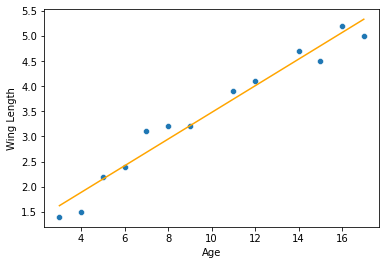

In [120]:
# Define variables and create scatterplot
age = np.concatenate( ( np.arange(3, 10), np.arange(11,13), np.arange(14,18) ), axis=0 )
wing_len = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]
data = {"Age":age, "Wing Length":wing_len}
ax = sbn.scatterplot(data=data, x="Age", y="Wing Length");

# Calculate linear regression
b_num = np.sum( np.multiply(age, wing_len ) ) - np.sum( age ) * np.sum( wing_len ) / len(age)
b_denom = np.sum( np.square( age ) ) - np.sum( age )**2 / len( age )
b = b_num / b_denom
a = np.mean( wing_len ) - b * np.mean(age)

# Create x-values and plot regression
x_vals = np.linspace( np.min( age ), np.max( age ), 100 )
reg_line = {"x":x_vals, 'Regression':x_vals * b + a }
sbn.lineplot( data=reg_line, x="x", y="Regression", ax=ax, color='orange' );
print(f"We can reject the null hypothesis because b is > 0. (b={b:.4f})")

# Confidence Interval (NOT SURE ABOUT THIS ONE)
mean_age = np.mean( age )
# sem_age = sem( age )
pop_mean = 0
S = np.sqrt( np.sum( np.square( age - mean_age ) ) / ( len( age ) - 1 ) )
t = ( mean_age - pop_mean ) / ( S / np.sqrt( len( age ) ) )

check = st.t.interval(alpha=0.95, df=len(age)-1, loc=np.mean(age), scale=st.sem(age) )
# print(check)
# ci = b + 

# Coefficient of determination
r2 = 1 - np.sum( np.square( wing_len - ( age * b + a ) ) ) / np.sum( np.square( age - mean_age ) )
print(f"The coefficient of deterimination is: {r2:.4f}")

# Pearson's R
r = np.sum( np.multiply( age - mean_age, wing_len - np.mean( wing_len ) ) ) / np.sqrt( np.sum( np.square( age - mean_age ) ) * np.sum( np.square( wing_len - np.mean( wing_len ) ) ) )
print(f"The Pearson's R is: {r:.4f}")
